<a href="https://colab.research.google.com/github/Sbilalahmad/AI_ML_mentorship/blob/main/DLP/Image_classifier_with_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense


In [4]:
(X_train, Y_train),(X_test,Y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


In [5]:
X_train.shape,Y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [6]:
print(X_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


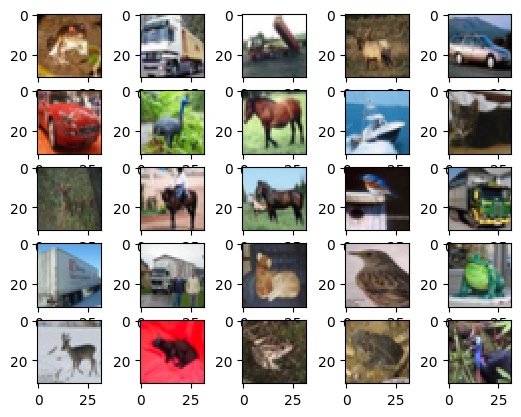

In [7]:
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(X_train[i])

In [34]:
classes=['airplane'
,	'automobile'
,	'bird'
,	'cat'
,	'deer'
,	'dog'
,	'frog'
,	'horse'
,	'ship'
,	'truck']

In [41]:
classes[Y_test[1][0]]

'ship'

In [43]:
X_train_scalled=X_train/255
X_test_scalled=X_test/255

In [20]:
Y_train_catagorical=keras.utils.to_categorical(Y_train,num_classes=10)
Y_test_catagorical=keras.utils.to_categorical(Y_test,num_classes=10)


In [44]:
model=keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000,activation='relu'),
        keras.layers.Dense(1000,activation='relu'),
        keras.layers.Dense(10,activation='softmax')
    ]
)
model.compile(
    optimizer='SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_scalled,Y_train_catagorical,epochs=10)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3099 - loss: 1.9266
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4162 - loss: 1.6459
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4551 - loss: 1.5498
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4754 - loss: 1.4824
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4992 - loss: 1.4322
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5126 - loss: 1.3865
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5288 - loss: 1.3527
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5411 - loss: 1.3145
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5503 - loss: 1.2796
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5637 - loss: 1.2493


In [55]:
Y_pred=np.argmax(model.predict(X_test_scalled)[555])
classes[Y_pred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


'ship'

In [57]:
model.evaluate(X_test_scalled,Y_test_catagorical)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4951 - loss: 1.4229


[1.4329712390899658, 0.48539999127388]

In [59]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [60]:
def get_model():
  model=keras.Sequential(
      [
            keras.layers.Flatten(input_shape=(32,32,3)),
            keras.layers.Dense(3000,activation='relu'),
            keras.layers.Dense(1000,activation='relu'),
            keras.layers.Dense(10,activation='softmax')

      ]

  )
  model.compile(
    optimizer='SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy']
  )
  return model


In [63]:
%%timeit -n1 -r1
with tf.device('CPU:0'):
  cpu_model= get_model()
  cpu_model.fit(X_train_scalled,Y_train_catagorical,epochs=1)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 107s 68ms/step - accuracy: 0.3018 - loss: 1.9319
2min 23s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [64]:
%%timeit -n1 -r1
with tf.device('GPU:0'):
  gpu_model= get_model()
  gpu_model.fit(X_train_scalled,Y_train_catagorical,epochs=1)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3031 - loss: 1.9310
8.63 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
